## Iris Dataset Classification using Linear Discriminant Analysis (LDA)

### Summary


In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load Iris Dataset

In [3]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print("Data shape : ", features.shape)

df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

Data shape :  (150, 4)


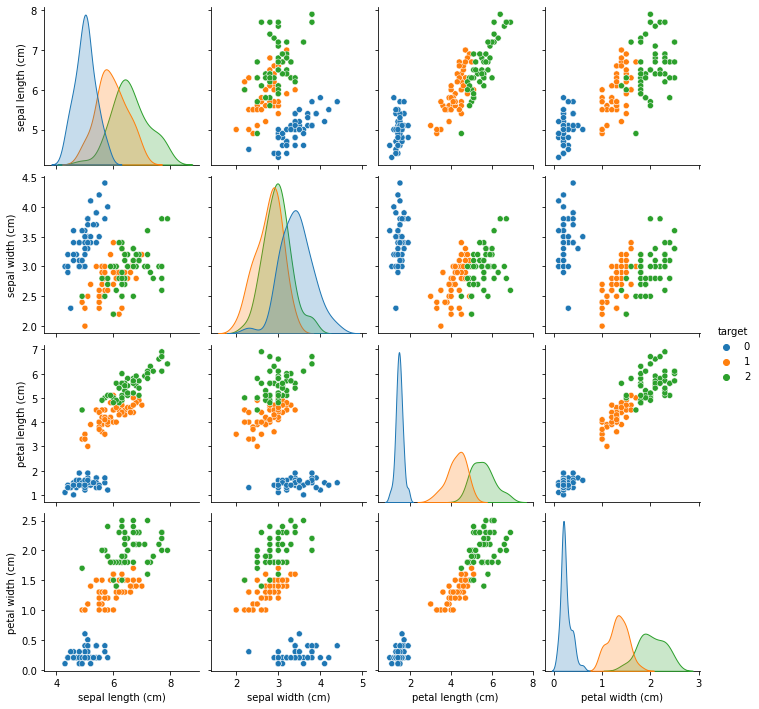

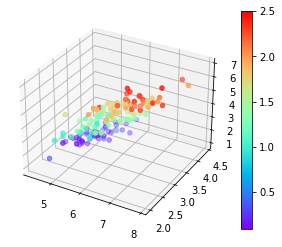

In [5]:
sns.pairplot(df, hue="target", palette="tab10")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[:, 0]
y = features[:, 1]
z = features[:, 2]
c = features[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.cm.rainbow)
fig.colorbar(img)
plt.show()

## Linear Discriminant Analysis

In [6]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    lda = LinearDiscriminantAnalysis()  # default = svd
    lda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = lda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

train size :  120  / test size :  30
----------------------------------------
Test set score: 0.980000
Training Time : 0.0001 sec
